In [1]:
%cd ..

/home/dawood/Workspace/face-keypoints


In [2]:
import cv2
import torch

from data.ls3d import LS3D
from models.fpn import FPN as Model

from torch.nn import functional as F
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
data = LS3D('/home/dawood/Datasets/LS3D-W/300VW-3D/Trainset/', augment=False)

In [9]:
model = Model(68).cuda()
model.load_state_dict(torch.load('/home/dawood/Experiments/face-keypoint90779150e9d44bd09ffb080b3925dc12/model_best_loss.weights')['state_dict'])

In [20]:
%time img, hm_gt = data[500]

CPU times: user 61 ms, sys: 3.21 ms, total: 64.2 ms
Wall time: 55.6 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


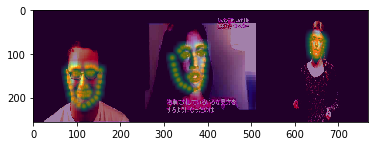

In [21]:
plt.imshow(img.permute(1,2,0).contiguous().numpy() )
plt.imshow(hm_gt[:68].max(0)[0].numpy(), alpha=0.5)

In [22]:
preds = model(img.unsqueeze(0).cuda())

In [23]:
preds[-1][0][:68].shape

torch.Size([68, 64, 192])

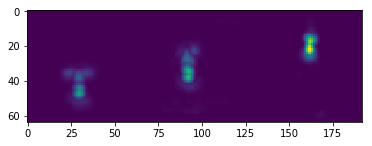

In [24]:
plt.imshow(preds[-1][0, :68].max(0)[0].cpu().detach().numpy())

In [11]:
model.calc_loss(preds, hm_gt.unsqueeze(0).cuda(), mask.unsqueeze(0).cuda())

NameError: name 'mask' is not defined

In [ ]:
mask.sum()